In [6]:
## Importamos librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files


In [185]:
data_og = pd.read_csv('/content/listings.csv')

In [186]:
# Revisamos .info
data_og.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1141 entries, 0 to 1140
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            1141 non-null   int64  
 1   listing_url                                   1141 non-null   object 
 2   scrape_id                                     1141 non-null   int64  
 3   last_scraped                                  1141 non-null   object 
 4   source                                        1141 non-null   object 
 5   name                                          1141 non-null   object 
 6   description                                   1108 non-null   object 
 7   neighborhood_overview                         564 non-null    object 
 8   picture_url                                   1141 non-null   object 
 9   host_id                                       1141 non-null   i

# Entendimiento inicial de los datos

A continuación se presenta un breve reporte de los datos

In [187]:
# Dimensiones del dataset
print('Dimensiones del dataset: ', data_og.shape)
print('Filas/registros de listings en Rotterdam: ', data_og.shape[0])
print('Atributos: ', data_og.shape[1])

Dimensiones del dataset:  (1141, 75)
Filas/registros de listings en Rotterdam:  1141
Atributos:  75


In [188]:
## Tipos de datos
print('Usando .dtypes y luego .unique()')
display(data_og.dtypes.unique())
print('')
print('En el set de datos hay:')
print('- 16 atributos tipo float64')
print('- 23 atributos tipo int64')
print('- 36 atributos tipo object. De estos hay strings, datetimes, json, entre otros')


Usando .dtypes y luego .unique()


array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)


En el set de datos hay:
- 16 atributos tipo float64
- 23 atributos tipo int64
- 36 atributos tipo object. De estos hay strings, datetimes, json, entre otros


In [189]:
## Top 5 atributos para análisis

# Creamos nuevo dataframe con los datos que consideramos más importantes
data = data_og[['id', 'neighbourhood_cleansed', 'accommodates', 'price', 'availability_365', 'review_scores_rating', 'room_type', 'number_of_reviews']]
print('Los atributos que consideramos más importantes son:')
display(data.columns)
print('')
print('Info:')
display(data.info())

Los atributos que consideramos más importantes son:


Index(['id', 'neighbourhood_cleansed', 'accommodates', 'price',
       'availability_365', 'review_scores_rating', 'room_type',
       'number_of_reviews'],
      dtype='object')


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1141 entries, 0 to 1140
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1141 non-null   int64  
 1   neighbourhood_cleansed  1141 non-null   object 
 2   accommodates            1141 non-null   int64  
 3   price                   878 non-null    object 
 4   availability_365        1141 non-null   int64  
 5   review_scores_rating    998 non-null    float64
 6   room_type               1141 non-null   object 
 7   number_of_reviews       1141 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 71.4+ KB


None

In [190]:
# Identificar datos faltantes
for ii in data.columns:
  print(ii, ': ', (100*data[ii].isnull().sum())/data.shape[0], '% de los datos están incompletos')

# Se eliminan datos incompletos
print('')
print('Como vemos que hay datos con gran porcentaje de información')
print('incompleta para nuestros atributos más importantes,')
print('procedemos a eliminarlos')
print('')
data = data.dropna()

# Identificar datos faltantes
for ii in data.columns:
  print(ii, ': ', (100*data[ii].isnull().sum())/data.shape[0], '% de los datos están incompletos')

# Eliminar duplicados
data = data.drop_duplicates()

id :  0.0 % de los datos están incompletos
neighbourhood_cleansed :  0.0 % de los datos están incompletos
accommodates :  0.0 % de los datos están incompletos
price :  23.049956178790534 % de los datos están incompletos
availability_365 :  0.0 % de los datos están incompletos
review_scores_rating :  12.532865907099035 % de los datos están incompletos
room_type :  0.0 % de los datos están incompletos
number_of_reviews :  0.0 % de los datos están incompletos

Como vemos que hay datos con gran porcentaje de información
incompleta para nuestros atributos más importantes,
procedemos a eliminarlos

id :  0.0 % de los datos están incompletos
neighbourhood_cleansed :  0.0 % de los datos están incompletos
accommodates :  0.0 % de los datos están incompletos
price :  0.0 % de los datos están incompletos
availability_365 :  0.0 % de los datos están incompletos
review_scores_rating :  0.0 % de los datos están incompletos
room_type :  0.0 % de los datos están incompletos
number_of_reviews :  0.0 % 

In [191]:
###############################
#### neighbourhood_cleansed ###
###############################

# Análisis para neighbourhood_cleansed
print('El dataset contiene', data["neighbourhood_cleansed"].unique().shape[0], 'barrios diferentes')

El dataset contiene 68 barrios diferentes


array([ 2,  1,  8, 12,  5, 16,  4,  3,  6,  7, 11,  9, 10])

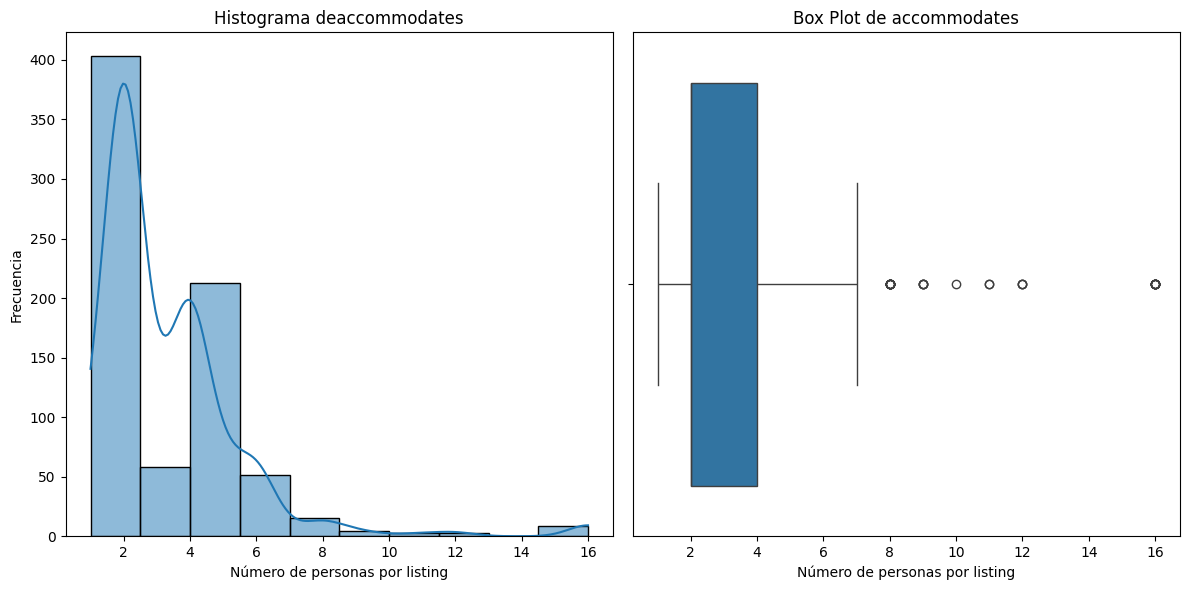

In [192]:
###############################
######## accommodates #########
###############################

# Análisis para accommodates
display(data["accommodates"].unique())
print('')
# Función para graficar histograma y boxplot
def distribucion(df, column, xlabel_text):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(df[column], bins=10, kde=True)
    plt.title('Histograma de'+column)
    plt.xlabel(xlabel_text)
    plt.ylabel('Frecuencia')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[column])
    plt.title('Box Plot de '+column)
    plt.xlabel(xlabel_text)

    plt.tight_layout()
    plt.show()

distribucion(data, 'accommodates','Número de personas por listing')

Los gráficos generados revelan que los alojamientos que pueden acomodar de 2 a 4 personas son los más comunes en este dataset.

El histograma muestra que la distribución está sesgada (skewed) a la derecha, lo que significa que hay algunos alojamientos que pueden acomodar a un número mucho mayor de personas. Estos alojamientos son valores no típicos, como se muestra en el diagrama de caja (16 por ejemplo)

In [193]:
data["accommodates"].describe()

,accommodates
count,759.000000
mean,3.279315
std,2.220314
min,1.000000
25%,2.000000
50%,2.000000
75%,4.000000
max,16.000000


Vemos como el 'mean' es cercano a 3, lo que quiere decir que la mayoría de nuestros listings en Rotterdam acomodan en promedio a 3 personas

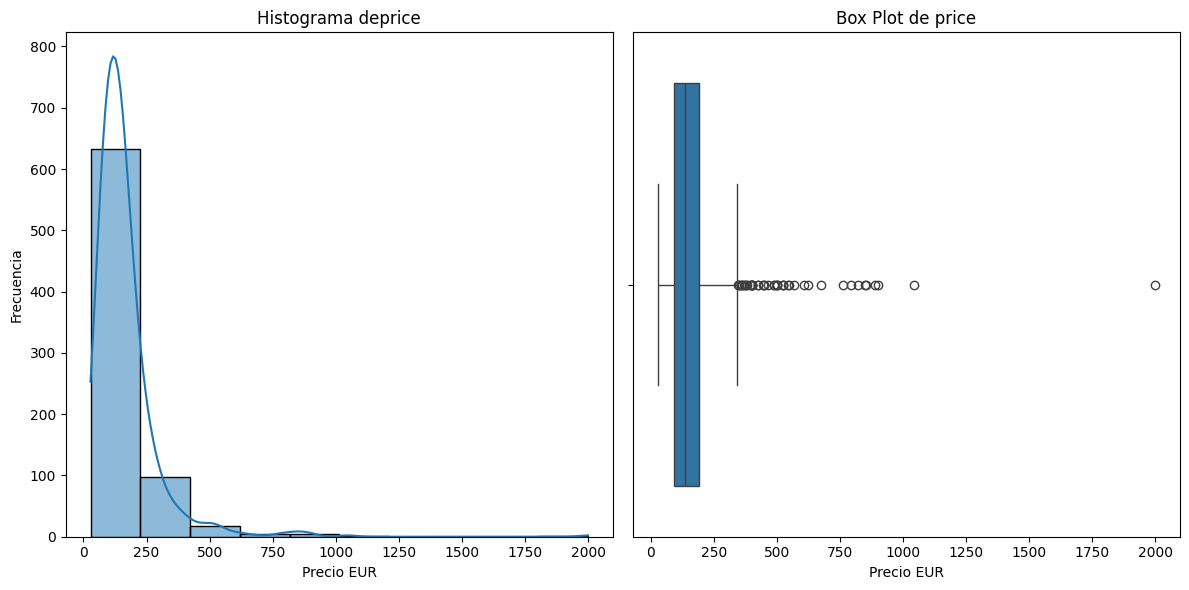

In [194]:
###############################
########### price #############
###############################

# Arreglar dato de precio por noche
data['price'] = data['price'].str.replace("[$,]", "", regex=True).astype(float)
distribucion(data, 'price', 'Precio EUR')

Los gráficos generados para la columna de precios muestran que la distribución está fuertemente sesgada a la derecha, con la mayoría de los alojamientos teniendo un precio por debajo de 500. Hay algunos valores atípicos extremos, que se pueden ver en el diagrama de caja. Esto indica que hay algunos alojamientos con precios muy altos en comparación con la mayoría.


[]

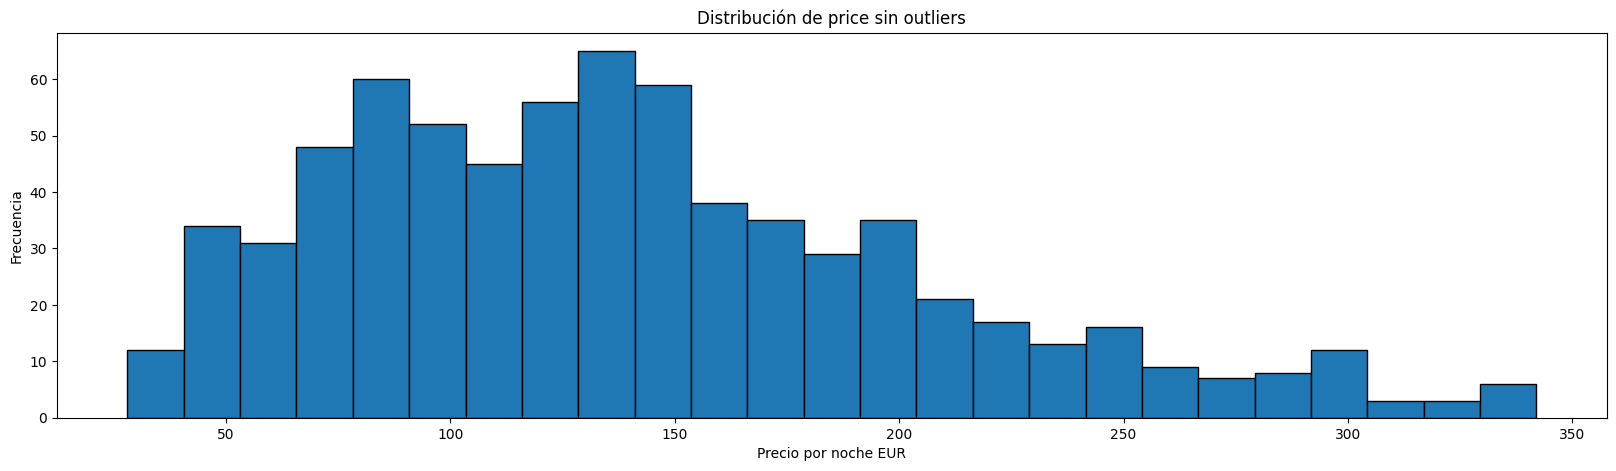

In [195]:
## Sin tener en cuenta los datos extremos (a los lados)
q1 = data["price"].quantile(0.25)
q3 = data["price"].quantile(0.75)
IQR = q3 - q1
plt.figure(figsize=(20, 5))
plt.hist(data.loc[data["price"] <= (q3 + 1.5 * IQR)]['price'], bins=25, edgecolor='black')
plt.xlabel('Precio por noche EUR')
plt.ylabel('Frecuencia')
plt.title("Distribución de price sin outliers")
plt.plot()

In [196]:
# Descripción básica de price sin outliers
data.loc[data["price"] <= (q3 + 1.5 * IQR)]['price'].describe()


,price
count,714.000000
mean,140.754902
std,65.707543
min,28.000000
25%,90.000000
50%,130.000000
75%,178.750000
max,342.000000


Eliminando los outliers para la descripción básica, podemos ver que la mayoría de listings en la ciudad tienen un precio por noche cercano a 140 EUR (la moda es 150). Se aprecia también un valor mínimo de 28 EUR.


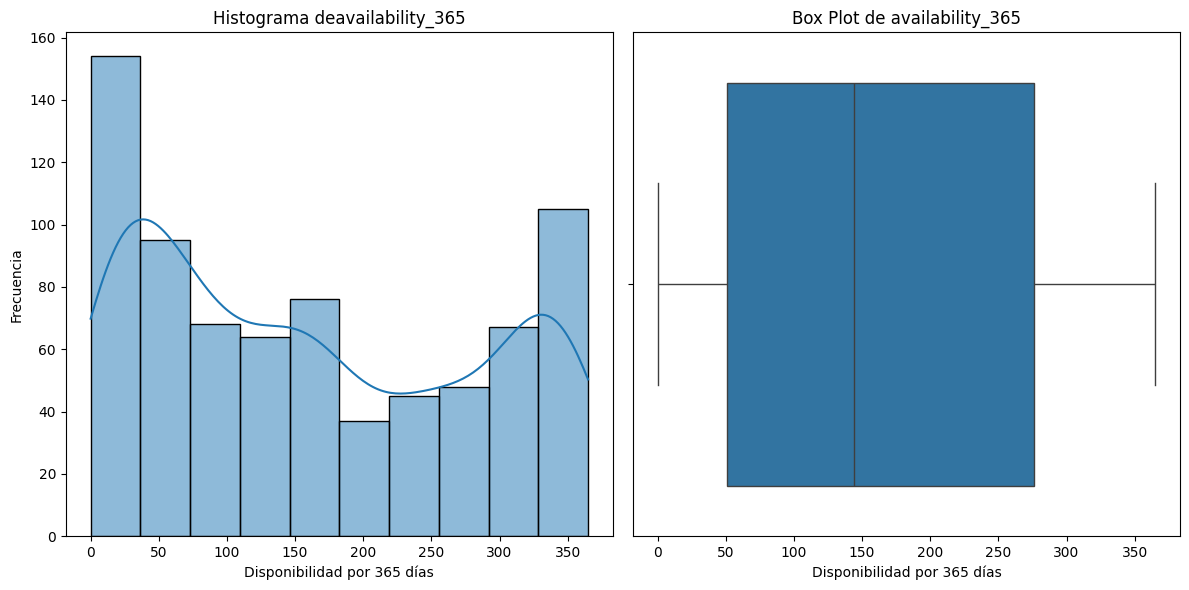

In [197]:
########################
### availability_365 ###
########################

# Análisis para availability_365
distribucion(data, 'availability_365', 'Disponibilidad por 365 días')

El histograma muestra que la distribución es bimodal, con un gran número de listings que tienen una disponibilidad de 0 días y otro pico alrededor de 365 días.
El diagrama de caja confirma la presencia de muchos alojamientos con 0 de disponibilidad, representados por el bigote inferior. También muestra algunos valores no típicos con disponibilidad muy alta, probablemente alojamientos que están casi siempre disponibles.

In [198]:
# Descripción básica
data["availability_365"].describe()

,availability_365
count,759.000000
mean,162.661397
std,119.773258
min,0.000000
25%,50.500000
50%,144.000000
75%,276.000000
max,365.000000


La descripción básica muestra que tenemos una media de 162 noches disponibles por año, además de tener listings con disponibilidad todo el año

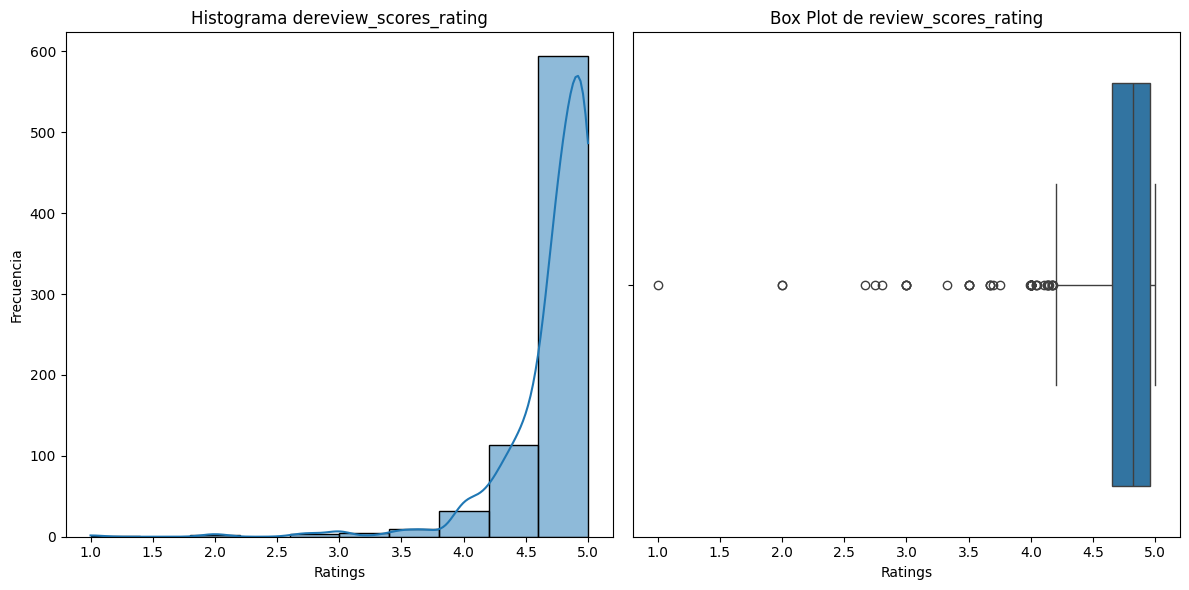

In [183]:
################################
##### review_scores_rating #####
################################
distribucion(data, 'review_scores_rating', 'Ratings')


Se observa que la distribución está sesgada a la izquierda. La mayoría de los alojamientos tienen calificaciones superiores a 4.5, con un pico alrededor de 4.75-5.

El diagrama de caja confirma esto, mostrando que la mayoría de las calificaciones están concentradas en el rango superior. Hay algunos valores atípicos, con calificaciones por debajo de 4, pero son pocos en comparación con las calificaciones altas.

In [184]:
#######################
##### room_type #######
#######################
print('El dataset contiene', data["room_type"].unique().shape[0], 'tipos de cuarto diferentes:')
display(data["room_type"].unique())
print('')
data["room_type"].value_counts(dropna=False, normalize=True)

El dataset contiene 4 tipos de cuarto diferentes:


array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

,proportion
room_type,
Entire home/apt,0.699605
Private room,0.276680
Shared room,0.013175
Hotel room,0.010540


Se observa que la gran mayoría, cercano a 3/4 partes de los listings en Rotterdam son de casas/apartamentos enteros, mientras que el resto son cuartos privados. El porcentaje de cuartos compartidos y cuartos de hotel son insignificantes



# Estrategia de análisis

Para la estrategia a utliizar, se implementará un análisis multivariado para establecer en cuáles barrios están los listings con mayor potencial de inversión. Para esto, se usarán análisis estadísticos para determinar la relación entre atributos como noches disponibles al año con precio por noche y tipo de listing/cuarto.

Con estos resultados podremos conocer las mejores oportunidades de inversión en Rotterdam y de esta forma hacer una recomendación para la compra de estos inmuebles.

Se identificará en qué rango de precios están los inmuebles con más clientes, y complementando con cuántas noches al año está libre el inmueble, se tomará la decisión.

# Desarrollo de la estrategia

Comenzamos por saber el precio promedio por noche por barrio en Rotterdam

In [130]:
precio_prom_barrio = data.groupby('neighbourhood_cleansed')['price'].mean().reset_index()
precio_prom_barrio = precio_prom_barrio.sort_values(by='price', ascending=False)
precio_prom_barrio

,neighbourhood_cleansed,price
1,Afrikaanderwijk,397.250
62,Struisenburg,309.750
67,Wielewaal,297.000
50,Pendrecht,270.000
25,Kop van Zuid,266.200
...,...,...
7,Carnisse,63.100
41,Ommoord,62.625
71,Zuidplein,52.000
24,Kleinpolder,NaN


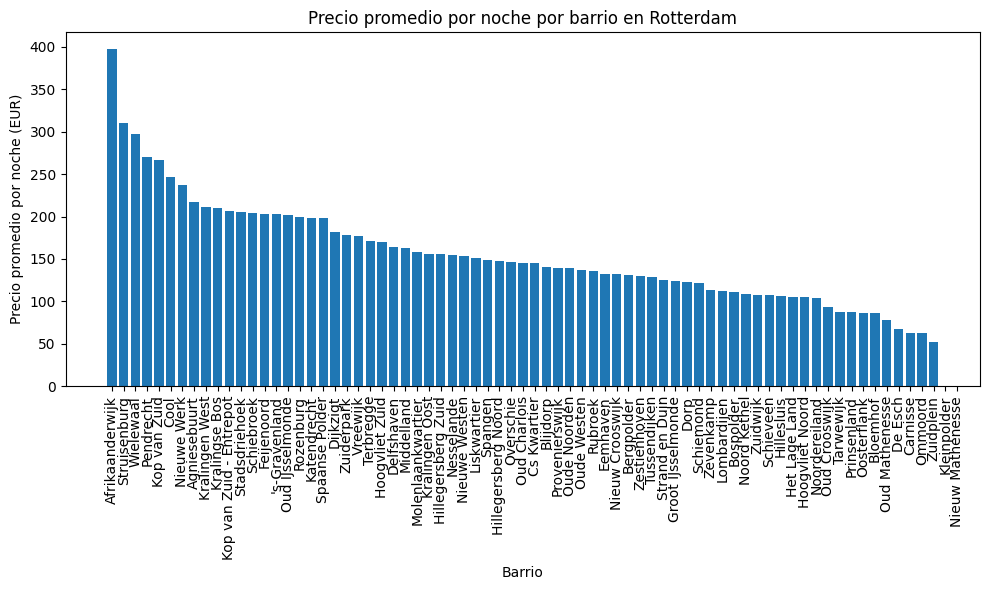

In [132]:
# Graficamos resultados
plt.figure(figsize=(10, 6))
plt.bar(precio_prom_barrio['neighbourhood_cleansed'], precio_prom_barrio['price'])
plt.xlabel('Barrio')
plt.ylabel('Precio promedio por noche (EUR)')
plt.title('Precio promedio por noche por barrio en Rotterdam')
plt.xticks(rotation=90)
plt.tight_layout()


Ahora encontramos el precio por noche por tipo de habitación por listing

In [133]:
precio_prom_barrio = data.groupby('room_type')['price'].mean().reset_index()
precio_prom_barrio = precio_prom_barrio.sort_values(by='price', ascending=False)
precio_prom_barrio

,room_type,price
1,Hotel room,409.100000
0,Entire home/apt,181.238854
2,Private room,115.643478
3,Shared room,46.700000


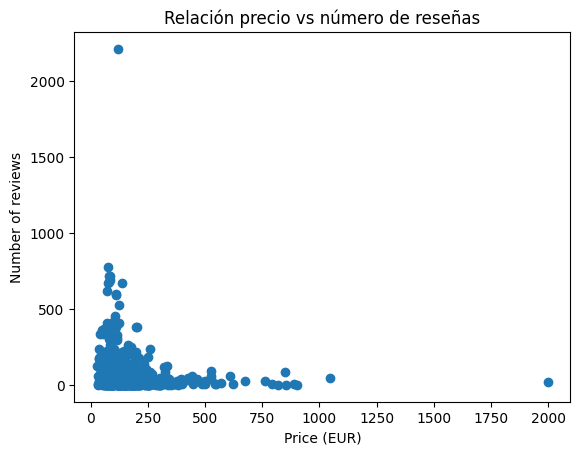

In [200]:
# Relación precio, número de reseñas
plt.scatter(data['price'],data['number_of_reviews'])
plt.title('Relación precio vs número de reseñas')
plt.xlabel('Price (EUR)')
plt.ylabel('Number of reviews')
plt.show()

La gráfica anterior nos muestra que hay mayor número de calificaciones por listing cuando este tiene precio más bajo, por lo cual podemos inferior que hay mayor cantidad de huespedes que se alojan en estos rangos de precio por noche.


In [269]:
# Filtrando dataframe original
data_f1 = data.loc[(data['price'] < 250) & (data['price'] > 100)]
data_f1.head()

,id,neighbourhood_cleansed,accommodates,price,availability_365,review_scores_rating,room_type,number_of_reviews
0,73155,Stadsdriehoek,2,125.0,301,4.94,Entire home/apt,120
1,77592,Middelland,2,150.0,0,4.78,Entire home/apt,18
2,101526,Dijkzigt,2,140.0,148,4.86,Entire home/apt,21
3,539905,Kralingen Oost,2,125.0,0,4.92,Entire home/apt,24
4,763422,Blijdorp,2,110.0,65,4.81,Private room,382


Se ha filtrado la tabla de listings para obtener unicamente los registros de inmuebles con precio por noche entre 100 EUR y 250 EUR.


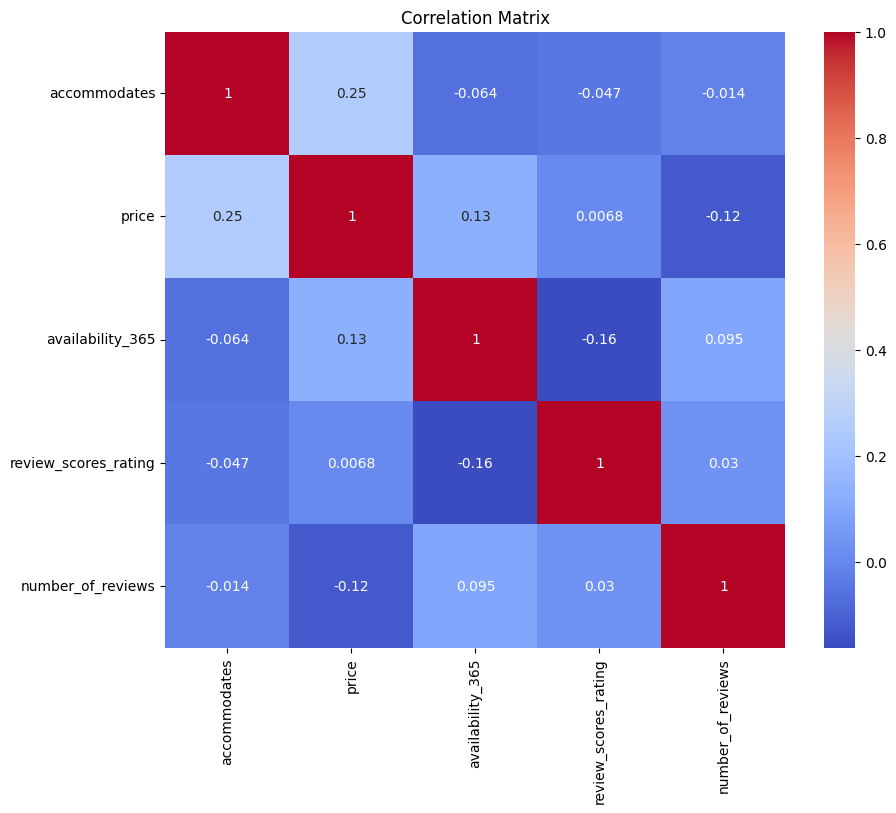

In [216]:
# Matriz de correlación
corr = data_f1[['accommodates', 'price', 'availability_365', 'review_scores_rating', 'number_of_reviews']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

El mapa de correlaciones confirma que a medida que un listing es más costoso, hay menos, en cierta medida, reseñas dejadas por los clientes. Además de esto, se ve una relación un poco más fuerte entre el precio y el número de personas que puede acomodar dicho listing.

In [260]:
# Para seleccionar nuestros candidatos finales, analizamos la disponibilidad al año
# Filtrando dataframe f1
data_f2 = data_f1.loc[(data['availability_365'] < 50) & (data['availability_365'] > 30)]
data_f2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 26 to 1107
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      30 non-null     int64  
 1   neighbourhood_cleansed  30 non-null     object 
 2   accommodates            30 non-null     int64  
 3   price                   30 non-null     float64
 4   availability_365        30 non-null     int64  
 5   review_scores_rating    30 non-null     float64
 6   room_type               30 non-null     object 
 7   number_of_reviews       30 non-null     int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 2.1+ KB


,neighbourhood_cleansed,price,number_of_reviews
15,Oude Westen,239.0,5.0
3,Cool,217.0,9.0
14,Oud Charlois,215.0,16.0
5,Feijenoord,196.0,11.0
7,Hillegersberg Noord,182.0,4.0
16,Overschie,181.0,46.0
1,Bergpolder,179.0,1.0
2,Blijdorp,167.0,43.0
4,Dijkzigt,165.0,7.0
8,Hillesluis,165.0,23.0


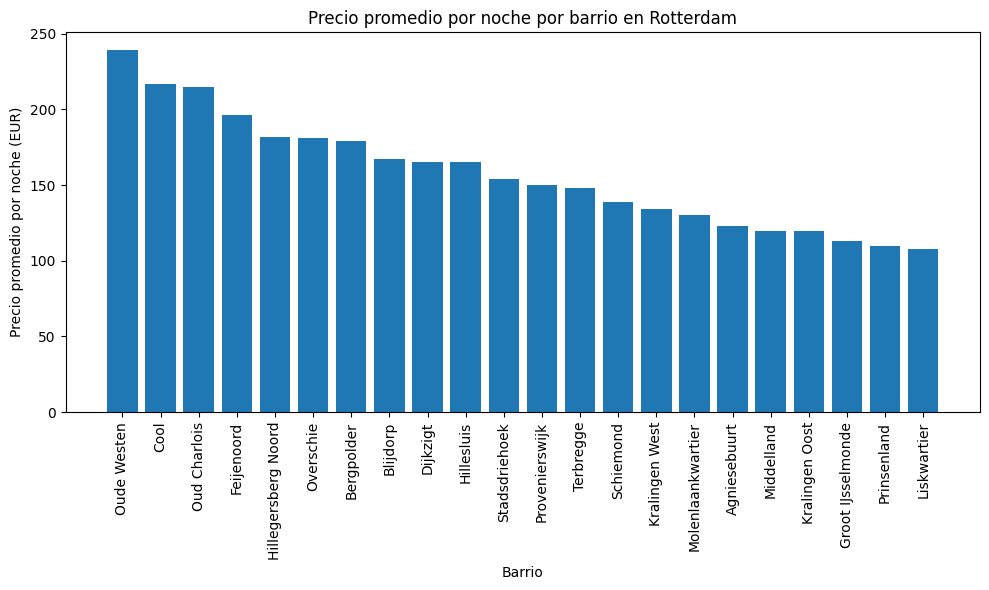

In [261]:
precio_prom_barrio = data_f2.groupby('neighbourhood_cleansed')[['price','number_of_reviews']].mean().reset_index()
precio_prom_barrio = precio_prom_barrio.sort_values(by='price', ascending=False)
display(precio_prom_barrio)
# Graficamos resultados
plt.figure(figsize=(10, 6))
plt.bar(precio_prom_barrio['neighbourhood_cleansed'], precio_prom_barrio['price'])
plt.xlabel('Barrio')
plt.ylabel('Precio promedio por noche (EUR)')
plt.title('Precio promedio por noche por barrio en Rotterdam')
plt.xticks(rotation=90)
plt.tight_layout()

In [262]:
# Identificar tipo de listing
precio_prom_barrio_2 = data_f2.groupby('room_type')['price'].mean().reset_index()
precio_prom_barrio_2 = precio_prom_barrio_2.sort_values(by='price', ascending=False)
precio_prom_barrio_2

,room_type,price
1,Private room,165.000000
0,Entire home/apt,155.448276


In [265]:
# Identificar mejor barrio
precio_prom_barrio.loc[precio_prom_barrio['number_of_reviews'] == precio_prom_barrio['number_of_reviews'].max()]

,neighbourhood_cleansed,price,number_of_reviews
20,Stadsdriehoek,154.2,89.6


In [267]:
data_f3 = data_f2.loc[data_f2['neighbourhood_cleansed'] == 'Stadsdriehoek']
data_f3

,id,neighbourhood_cleansed,accommodates,price,availability_365,review_scores_rating,room_type,number_of_reviews
170,22112524,Stadsdriehoek,5,205.0,33,4.38,Entire home/apt,380
296,36096173,Stadsdriehoek,4,136.0,31,4.90,Entire home/apt,40
778,837031940776219277,Stadsdriehoek,2,165.0,48,5.00,Entire home/apt,8
895,958085356741747134,Stadsdriehoek,4,140.0,40,4.72,Entire home/apt,18
1057,1134521939488427990,Stadsdriehoek,3,125.0,31,4.50,Entire home/apt,2
